# Topic modeling 


In [1]:
import pandas as pd

The data is too big so we wont take all of it we will get first 36000 row 

In [2]:
data = pd.read_csv('articles1.csv')[:36000]

Remove nulls and duplicates 

In [3]:
content = data['content'].drop_duplicates().dropna()[:36000]

In [4]:
d = data["content"].drop_duplicates().dropna()[:36000]

In [5]:
len(content)

35955

In [6]:
len(d)

35955

In [7]:
d.to_frame() 
type(d)

pandas.core.series.Series

In [8]:
type(content)

pandas.core.series.Series

In [11]:
content.head()

0    WASHINGTON  —   Congressional Republicans have...
1    After the bullet shells get counted, the blood...
2    When Walt Disney’s “Bambi” opened in 1942, cri...
3    Death may be the great equalizer, but it isn’t...
4    SEOUL, South Korea  —   North Korea’s leader, ...
Name: content, dtype: object

# Visualize content 

This cell visualize the content[0] 'first row' before it preprocessed

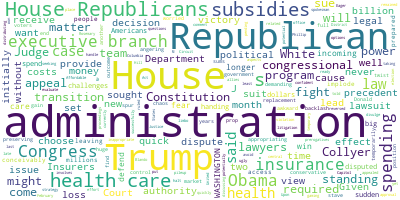

In [13]:
# Import the wordcloud library
from wordcloud import WordCloud
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(content[0])
# Visualize the word cloud
wordcloud.to_image()

## Data preprocessing

In [13]:
from nltk.corpus import stopwords  # Text data
from nltk.tokenize import sent_tokenize, word_tokenize
stop_words = set(stopwords.words("english"))
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import string

def Preprocessing_data(data):
    x = 0
    content_list = []
    for lines in data:        
#         lines = lines.translate(str.maketrans('', '', string.punctuation))
        words = word_tokenize(lines) # word tokenize
        filtered_list = [word for word in words if word.casefold() not in stop_words]  # remove stopwords

        lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_list]  # lemma the words

        lines = ' '.join(lemmatized_words)
        content_list.append(lines)

    content_df = pd.DataFrame(content_list, columns=["content"])

    return content_df

In [10]:
dd = Preprocessing_data(d)

In [11]:
type(dd)

pandas.core.frame.DataFrame

In [20]:
ds = dd['content'] # make series

In [21]:
type(ds)

pandas.core.series.Series

"max_df" max probability of the apperance of one word
, "min_df" min probability of the apperance of one word
, "stop_words" remove the unnecessary word that could decrease the accuracy

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
data_cv = cv.fit_transform(ds)

Note in old version of sklearn you can use "cv.get_feature_names" instade of "cv.get_feature_names_out"

In [23]:
len(cv.get_feature_names_out()) # unique words

75966

In [24]:
data_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
import random
for i in range(10):
    random_word_id = random.randint(0,75965)
    print(cv.get_feature_names_out()[random_word_id])


faymann
tv4
ist
joey
bangsamoro
bionic
delorme
slithers
roswell
girardeau


we choose K = 7 according to elbow method.
WCSS - It is defined as the sum of square distances between the centroids and each points.

In [26]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=7,random_state=42)
LDA.fit(data_cv)

LatentDirichletAllocation(n_components=7, random_state=42)

In [27]:
len(LDA.components_)

7

In [28]:
LDA.components_

array([[5.47985535e+00, 7.58744703e+02, 1.42885580e-01, ...,
        1.42857146e-01, 1.42865844e-01, 1.45561319e-01],
       [3.97856539e+01, 1.98082594e+03, 1.26759336e+00, ...,
        1.43219721e-01, 1.43502372e-01, 1.42857148e-01],
       [1.40356893e+03, 8.21096270e+02, 1.42857145e-01, ...,
        1.42885374e-01, 1.42857146e-01, 1.42857145e-01],
       ...,
       [5.12980308e+00, 7.24842469e+03, 2.01802494e+00, ...,
        1.42857146e-01, 1.42857147e-01, 1.14252858e+00],
       [3.06811001e+00, 7.61290487e+02, 1.42890215e-01, ...,
        1.42937468e-01, 1.18644838e+00, 1.44274664e-01],
       [1.88958895e+02, 7.94969546e+02, 1.42857148e-01, ...,
        2.14122858e+00, 3.09812939e+00, 1.42857149e-01]])

In [29]:
len(LDA.components_) , len(LDA.components_[0])

(7, 75966)

In [30]:
single_topic = LDA.components_[0]
single_topic.argsort()

array([12371, 26564,  2176, ..., 74962, 39784, 58802], dtype=int64)

In [31]:
single_topic.argsort()[-10:]

array([41344, 27506, 73166, 74314, 46627, 50599, 68044, 74962, 39784,
       58802], dtype=int64)

In [32]:
for index in single_topic.argsort()[-10:]:
    print(cv.get_feature_names_out()[index])

make
game
way
woman
new
people
time
year
like
said


In [33]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['say', 'think', 'thing', 'life', 'world', 'make', 'game', 'way', 'woman', 'new', 'people', 'time', 'year', 'like', 'said']


THE TOP 15 WORDS FOR TOPIC #1
['european', 'migrant', 'terrorist', 'united', 'muslim', 'year', 'group', 'court', 'government', 'islamic', 'state', 'people', 'attack', 'country', 'said']


THE TOP 15 WORDS FOR TOPIC #2
['think', 'house', 'election', 'news', 'hillary', 'republican', 'people', 'donald', 'say', 'campaign', 'mr', 'president', 'said', 'clinton', 'trump']


THE TOP 15 WORDS FOR TOPIC #3
['home', 'man', 'time', 'told', 'day', 'family', 'officer', 'new', 'people', 'year', 'city', 'ms', 'police', 'mr', 'said']


THE TOP 15 WORDS FOR TOPIC #4
['people', 'immigration', '000', 'government', 'health', 'mr', 'million', 'new', 'federal', 'law', 'percent', 'state', 'company', 'year', 'said']


THE TOP 15 WORDS FOR TOPIC #5
['state', 'government', 'administration', 'obama', 'states', 'russian', 'security', 'china', 'united', 'russia'

In [34]:
topic_results = LDA.transform(data_cv)

In [35]:
topic_results.shape

(35955, 7)

In [36]:
topic_results[0].round(2)

array([0.  , 0.  , 0.23, 0.  , 0.77, 0.  , 0.  ])

In [37]:
topic_results.argmax(axis=1)

array([4, 3, 0, ..., 0, 4, 0], dtype=int64)

In [38]:
Topics = topic_results.argmax(axis=1)
Topics

array([4, 3, 0, ..., 0, 4, 0], dtype=int64)

In [39]:
df = pd.DataFrame({'Content': d, 'Topic #': Topics})

In [40]:
df

,Content,Topic #
0,WASHINGTON — Congressional Republicans have...,4
1,"After the bullet shells get counted, the blood...",3
2,"When Walt Disney’s “Bambi” opened in 1942, cri...",0
3,"Death may be the great equalizer, but it isn’t...",0
4,"SEOUL, South Korea — North Korea’s leader, ...",5
...,...,...
35995,(CNN) Donald Trump and his advisers are defen...,2
35996,(CNN) Novak Djokovic crashed out of Wimbledon...,0
35997,(CNN) Mark Cavendish claimed the yellow jerse...,0
35998,(CNN) North Carolina’s controversial bathroom...,4


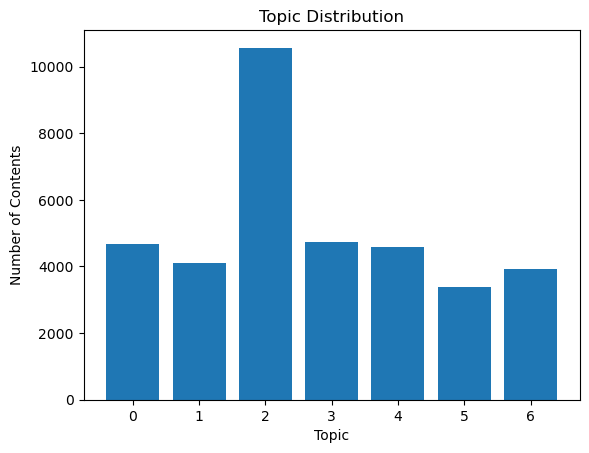

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# group the data by topic and count the number of occurrences
topic_counts = df.groupby('Topic #').count()['Content']

# create a bar chart of the topic distribution
plt.bar(topic_counts.index, topic_counts.values)
plt.xlabel('Topic')
plt.ylabel('Number of Contents')
plt.title('Topic Distribution')
plt.show()